In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv('train.csv')

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Random          700 non-null    float64
 1   Machine nbr     700 non-null    int64  
 2   lifetime        700 non-null    int64  
 3   pressureInd     699 non-null    float64
 4   moistureInd     698 non-null    float64
 5   temperatureInd  699 non-null    float64
 6   team            700 non-null    int64  
 7   provider        700 non-null    int64  
 8   broken          700 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 49.3+ KB


In [509]:
df.describe()

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
count,700.000000,700.000000,700.000000,699.000000,698.000000,699.000000,700.000000,700.000000
mean,0.500803,506.242857,57.484286,98.518565,99.697367,101.633439,2.000000,2.462857
std,0.293198,288.266857,49.532851,20.231142,10.054600,27.919472,0.804138,1.101458
min,0.000989,2.000000,1.000000,33.481917,58.547301,42.279598,1.000000,1.000000
25%,0.245743,256.750000,32.750000,85.657184,92.818551,87.236767,1.000000,1.000000
50%,0.492816,508.500000,60.000000,96.684659,99.843030,100.855972,2.000000,2.000000
75%,0.748046,753.250000,80.000000,112.019428,106.308898,113.935906,3.000000,3.000000
max,0.996737,999.000000,800.000000,173.282541,128.595038,620.086828,3.000000,4.000000


In [510]:
df.head(5)

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
0,0.437420,723,60,77.836105,112.832544,121.786371,3,3,Yes
1,0.688345,107,88,89.350620,95.228125,99.082317,1,4,Yes
2,0.805670,153,30,130.089477,96.367747,103.608344,1,3,No
3,0.923187,140,79,87.421990,110.941574,129.691510,2,1,Yes
4,0.036583,359,2,69.939898,86.292387,91.861983,3,3,No


In [511]:
df.shape

(700, 9)

In [512]:
df.iloc[:,-1]

0      Yes
1      Yes
2       No
3      Yes
4       No
      ... 
695    Yes
696    Yes
697     No
698     No
699    Yes
Name: broken, Length: 700, dtype: object

In [513]:
df[df['pressureInd'].isnull()]

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
72,0.30026,209,46,NaN,108.500048,82.372952,2,1,No


In [514]:
df[df['moistureInd'].isnull()]

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
174,0.950821,924,48,123.046048,NaN,95.825929,3,1,No
188,0.639391,812,8,100.777048,NaN,93.774378,1,4,No


In [515]:
df[df['temperatureInd'].isnull()]

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
227,0.262716,970,12,57.463213,104.979089,NaN,2,2,No


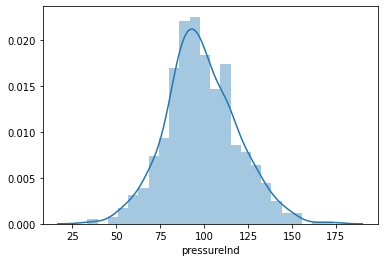

In [516]:
sns.distplot(df['pressureInd'])

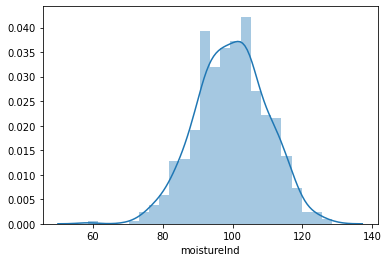

In [517]:
sns.distplot(df['moistureInd'])

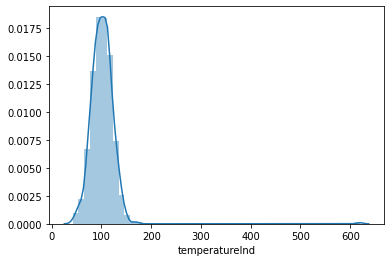

In [518]:
sns.distplot(df['temperatureInd'])

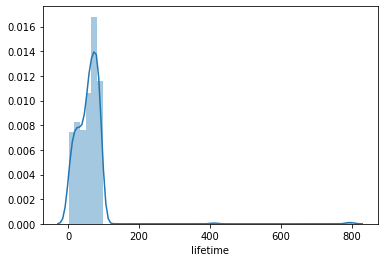

In [519]:
sns.distplot(df['lifetime'])

In [520]:
np.mean(df['pressureInd']) ,np.mean(df['moistureInd']), np.mean(df['temperatureInd'])

(98.51856537961388, 99.69736668959885, 101.63343885902715)

In [521]:
filt_data=df[pd.notnull(df['pressureInd'])]
filt_data.shape

(699, 9)

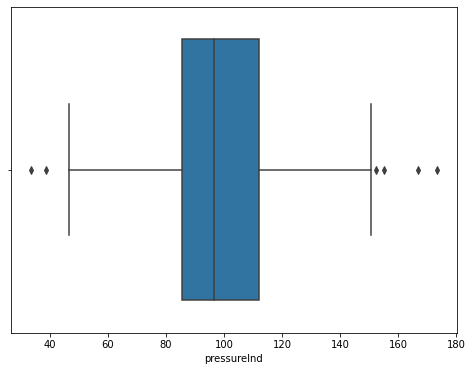

In [522]:
plt.figure(figsize=(8,6))
sns.boxplot(filt_data['pressureInd'])

In [523]:
iqr=stats.iqr(filt_data['pressureInd'],rng=(25,75))
q1=np.percentile(filt_data['pressureInd'],25,interpolation='midpoint')
q3=np.percentile(filt_data['pressureInd'],75,interpolation='midpoint')
r1=q1-1.5*iqr
r2=q3+1.5*iqr
r1,r2

(46.113818474999995, 151.562794115)

In [0]:
lis=filt_data[(filt_data['pressureInd']>r2) | (filt_data['pressureInd']<r1)].index
l=list(lis)

In [525]:
df.iloc[lis]

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
6,0.264124,20,11,166.785898,97.244213,89.585687,2,2,No
305,0.507886,940,34,152.247259,104.465022,68.166865,3,3,No
404,0.900353,79,63,154.924585,77.677249,112.048807,2,4,No
485,0.965515,507,85,173.282541,111.662654,124.708910,3,2,Yes
561,0.545088,469,80,33.481917,102.310309,97.359616,2,1,Yes
598,0.435107,408,52,38.787548,116.491817,125.002526,3,4,No


In [526]:
filt_data=df[pd.notnull(df['moistureInd'])]
filt_data.shape

(698, 9)

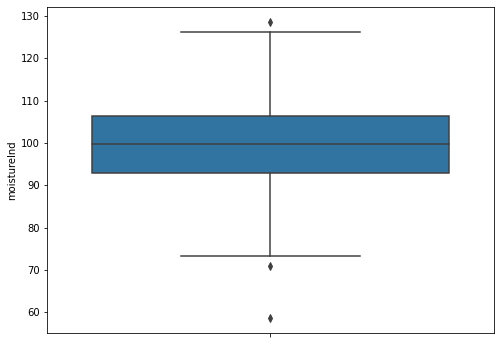

In [527]:
plt.figure(figsize=(8,6))
sns.boxplot(y=filt_data['moistureInd'])

In [528]:
iqr=stats.iqr(filt_data['moistureInd'],rng=(25,75))
q1=np.percentile(filt_data['moistureInd'],25,interpolation='midpoint')
q3=np.percentile(filt_data['moistureInd'],75,interpolation='midpoint')
r1=q1-1.5*iqr
r2=q3+1.5*iqr
r1,r2

(72.58433828874996, 126.54230553625004)

In [0]:
ls=filt_data[(filt_data['moistureInd']>r2) | (filt_data['moistureInd']<r1)].index
l.extend(ls)

In [530]:
df.iloc[ls]

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
272,0.369308,84,12,56.907662,70.928815,110.712201,1,2,No
336,0.346097,178,60,113.226928,128.595038,96.488739,1,1,No
580,0.861765,44,65,51.699508,58.547301,60.518204,2,3,Yes


In [531]:
filt_data=df[pd.notnull(df['temperatureInd'])]
filt_data.shape

(699, 9)

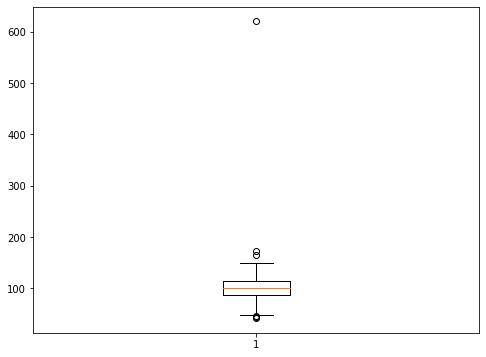

In [532]:
plt.figure(figsize=(8,6))
plt.boxplot(filt_data['temperatureInd'])
plt.show()

In [533]:
iqr=stats.iqr(filt_data['temperatureInd'],rng=(25,75))
q1=np.percentile(filt_data['temperatureInd'],25,interpolation='midpoint')
q3=np.percentile(filt_data['temperatureInd'],75,interpolation='midpoint')
r1=q1-1.5*iqr
r2=q3+1.5*iqr
r1,r2

(47.18805931250001, 153.9846132125)

In [0]:
ls=filt_data[(filt_data['temperatureInd']>r2) | (filt_data['temperatureInd']<r1)].index
l.extend(ls)

In [535]:
df.iloc[ls]

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
36,0.524967,608,44,124.358923,97.199080,46.857047,1,3,No
76,0.204760,616,62,114.142562,97.905471,165.169955,3,1,No
147,0.241437,387,13,86.024851,80.532008,172.544140,2,1,No
284,0.497260,779,86,119.147172,88.697833,44.058619,3,2,Yes
367,0.384643,745,40,105.514286,99.481564,620.086828,3,2,No
524,0.389311,902,90,87.727274,117.513535,42.279598,1,2,No


In [536]:
l

[6, 305, 404, 485, 561, 598, 272, 336, 580, 36, 76, 147, 284, 367, 524]

In [537]:
df.iloc[l]

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
6,0.264124,20,11,166.785898,97.244213,89.585687,2,2,No
305,0.507886,940,34,152.247259,104.465022,68.166865,3,3,No
404,0.900353,79,63,154.924585,77.677249,112.048807,2,4,No
485,0.965515,507,85,173.282541,111.662654,124.708910,3,2,Yes
561,0.545088,469,80,33.481917,102.310309,97.359616,2,1,Yes
598,0.435107,408,52,38.787548,116.491817,125.002526,3,4,No
272,0.369308,84,12,56.907662,70.928815,110.712201,1,2,No
336,0.346097,178,60,113.226928,128.595038,96.488739,1,1,No
580,0.861765,44,65,51.699508,58.547301,60.518204,2,3,Yes
36,0.524967,608,44,124.358923,97.199080,46.857047,1,3,No


In [538]:
lis=l
lis.sort()
lis

[6, 36, 76, 147, 272, 284, 305, 336, 367, 404, 485, 524, 561, 580, 598]

In [539]:
df.drop(l,inplace=True)
df.iloc[lis]

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
7,0.650043,542,62,94.415823,95.073117,107.696747,3,2,No
38,0.038162,753,10,114.684324,112.865138,76.556266,1,3,No
79,0.995048,41,65,90.944893,92.353561,140.603021,2,3,Yes
151,0.692788,935,80,95.915754,95.065810,84.593595,1,1,Yes
277,0.634416,514,60,118.033622,98.528041,131.592075,3,3,Yes
290,0.015544,89,49,105.542133,97.289688,112.937396,2,4,No
312,0.456191,694,65,75.463804,113.005930,122.009132,2,3,Yes
344,0.902559,564,25,91.067715,99.413137,106.635945,2,2,No
376,0.959071,118,74,110.197671,109.912879,96.717913,3,1,Yes
414,0.566664,502,60,86.000464,100.134087,111.421225,2,3,No


In [544]:
 df.head(10)                                                                               

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
0,0.437420,723,60,77.836105,112.832544,121.786371,3,3,Yes
1,0.688345,107,88,89.350620,95.228125,99.082317,1,4,Yes
2,0.805670,153,30,130.089477,96.367747,103.608344,1,3,No
3,0.923187,140,79,87.421990,110.941574,129.691510,2,1,Yes
4,0.036583,359,2,69.939898,86.292387,91.861983,3,3,No
5,0.716907,10,81,97.501826,92.228039,80.800159,3,4,Yes
7,0.650043,542,62,94.415823,95.073117,107.696747,3,2,No
8,0.636112,156,27,102.676657,88.963203,102.979857,3,4,No
9,0.906825,324,52,93.099811,103.466191,71.497776,2,3,No
10,0.575802,453,41,93.797168,92.230875,117.877573,1,2,No


In [550]:
df['pressureInd'].fillna(np.mean(df['pressureInd']),inplace=True)
df['moistureInd'].fillna(np.mean(df['moistureInd']),inplace=True)
df['temperatureInd'].fillna(np.mean(df['temperatureInd']),inplace=True)

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
72,0.300260,209,46,98.371664,108.500048,82.372952,2,1,No
174,0.950821,924,48,123.046048,99.765022,95.825929,3,1,No
192,0.482895,655,81,85.126347,112.589162,104.285315,3,4,Yes
231,0.141238,311,80,116.034761,113.029899,118.984113,2,1,Yes


In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Random          685 non-null    float64
 1   Machine nbr     685 non-null    int64  
 2   lifetime        685 non-null    int64  
 3   pressureInd     685 non-null    float64
 4   moistureInd     685 non-null    float64
 5   temperatureInd  685 non-null    float64
 6   team            685 non-null    int64  
 7   provider        685 non-null    int64  
 8   broken          685 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 53.5+ KB


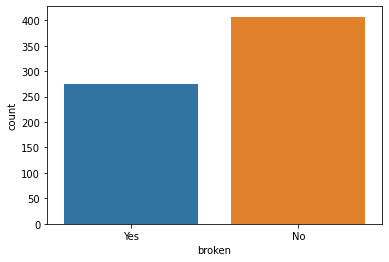

In [543]:
sns.countplot(data=dat,x=dat['broken'])

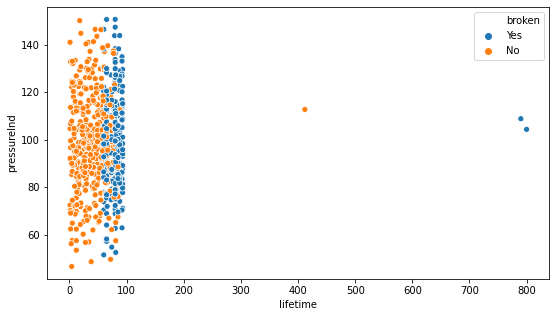

In [557]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df,x=df['lifetime'],y=df['pressureInd'],hue=df['broken'])

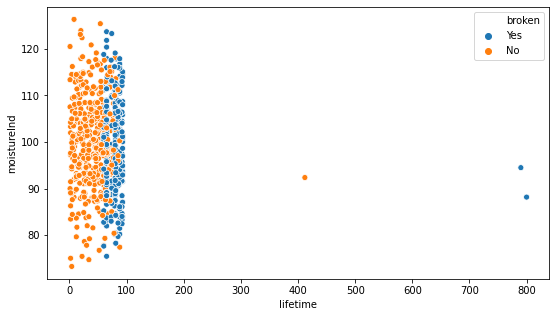

In [558]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df,x=df['lifetime'],y=df['moistureInd'],hue=df['broken'])

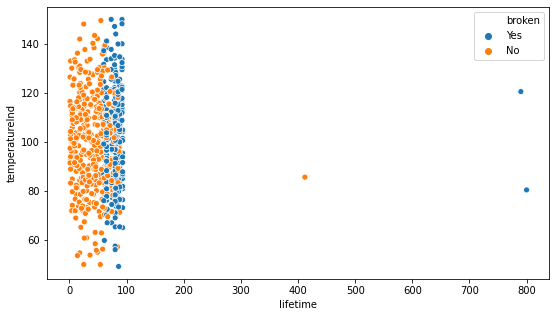

In [560]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df,x=df['lifetime'],y=df['temperatureInd'],hue=df['broken'])